## Exploring the Impact of Air pollution on Bicycle sharing in Seoul: A Comprehensive Analysis 
### Outline
1. Introduction<br>
2. Data Source Details<br>
    2.1. Datasource1: Bike sharing Data in Seoul<br>
    2.2. Datasource2: Air pollution Data of Seoul<br>
3. Project Structure: ETL Pipeline<br>
4. Install Dependencies and Load Data<br>
    4.1. Import Packages<br>
    4.2. Load Data<br>
5. Data Exploration<br>
    5.1. Exploration of the Bike sharing  Data in Seoul<br>
    5.2. Exploration of the Air pollution Data of Seoul<br>
    5.3. Exploration Summary<br>
6. Modifying and Combining Two Data Sources<br>
    6.1. Modifiying Bike sharing  Data in Seoul<br>
    6.2. Air pollution Data of Seoul<br>
    6.3. Combining Two Data Sources<br>
7. Exploratory Data Analysis (EDA)<br>
    7.1. Descriptive Statistics<br>
    7.2. Histograms<br>
    7.3. Box Plots<br>
8. Questions and Analysis<br>
    8.1. How does the temperature in Seoul city vary throughout the years?<br>
    8.2. How does the bike sharing in Seoul city vary throughout the years?<br>
    8.3. Does temperature affect bike sharing in Seoul city?<br>
    8.4. Is there any relation between the monthly Humidity total and average snowfall on the total bike sharing in Seoul?<br>
    8.5. How do NO2 and PM10 impact the total bike sharing in Seoul?<br>
    8.6. How do the different seasons impact the total bicycle traffic in Seoul?<br>
9. Summery<br>
10. Future Work

### 1. Introduction

This project aims to analyze **the weather and pollution conditions of Seoul and its bike sharing** generated from several automatic counting stations throughout the city to determine if Seoul is a suitable city for an enthusiastic cyclist to live in. The project is using two open data sources:[https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing/data], which contains information on bike sharing in Seoul, and [https://www.kaggle.com/datasets/bappekim/air-pollution-in-seoul], which provides air pollution data of Seoul.

Now, the question that interests us is: **How do the weather conditions and air pollution in Seoul impact bike sharing throughout the year?** And we will try to answer this question by focusing on several short questions.

1. How does the temperature in Seoul city vary throughout the years?<br> 
2. How does the bike sharing in Seoul city vary throughout the years?<br> 
3. Does temperature affect bike sharing in Seoul city?<br> 
4. Is there any relation between the monthly Humidity total and wind speed on the total bike sharing in Seoul?<br> 
5. How do NO2 and PM10 impact the total bike sharing in Seoul?<br> 
6. How do the different seasons impact the total bicycle traffic in Seoul?<br>

### 2. Data Source Details
#### 2.1. Datasource1: Bike sharing Data in Seoul
* Source: [Kaggle][https://www.kaggle.com/]
* Metadata URL: [https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing/data]
* Sample Data URL: [https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing/data]
* Data Type: CSV

This data source contains Seoul's bike sharing data of Seoul

#### 2.2. Datasource2: Air pollution Data of Seoul
* Source: [Kaggle][https://www.kaggle.com/]
* Metadata URL: [https://www.kaggle.com/datasets/bappekim/air-pollution-in-seoul]
* Sample Data URL: [https://data.seoul.go.kr/dataList/OA-15526/S/1/datasetView.do], [https://data.seoul.go.kr/dataList/OA-15516/S/1/datasetView.do]
* Data Type: CSV

This data source will provide Air pollution data in Seoul, including Measurement date, Station code,Address,	Latitude,Longitude, SO2, NO2, O3, CO, PM10, PM2.5

### 3. Project Structure: ETL Pipeline

The project follows a structured ETL (Extract, Transform, Load) pipeline approach, encompassing various directories and modules with specific functionalities. The `etl_pipeline.py` serves as the entry point for running the pipeline using the command `python etl_pipeline.py`, resulting in the generation of the final dataset stored in an SQLite database.

### 4. Install Dependencies and Load Data

To install the dependencies for this project, run the following command to install the dependencies specified in the `requirements.txt` file: `pip install -r requirements.txt`

In [47]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Piyal\Downloads\made-project-ws24-main\made-project-ws24-main\dataengg\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Piyal\Downloads\made-project-ws24-main\made-project-ws24-main\dataengg\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Piyal\Downloads\made-project-ws24-main\made-project-ws24-main\dataengg\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Piyal\Downloads\made-project-ws24-main\made-project-ws24-main\dataengg\Scripts\python.exe -m pip install --upgrade pip' command.


#### 4.1. Import Packages

In [48]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.ticker as ticker
import seaborn as sns

#### 4.2. Load Data

This section involves retrieving the data from a sqlite database and loading it into two Pandas DataFrames. And then merge these together for creating comprehensive report.

In [49]:
conn = sqlite3.connect('data/seoul.sqlite')
bicycle_sharing_df = pd.read_sql_query(f"SELECT * FROM bike_data", conn)
weather_data_df = pd.read_sql_query(f"SELECT * FROM air", conn)
conn.close()

In [50]:
bicycle_sharing_df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Working Day
0,01/12/2017,254.0,0.0,-5.2,37,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204.0,1.0,-5.5,38,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173.0,2.0,-6.0,39,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107.0,3.0,-6.2,40,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78.0,4.0,-6.0,36,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [51]:
weather_data_df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


### 5. Data Exploration

This section focuses on exploring two sets of data further: [Seoul bike sharing dataset](https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing/data) and [Seoul Weather Data](https://www.kaggle.com/datasets/bappekim/air-pollution-in-seoul).

#### 5.1. Exploration of the Bike sharing Data in Seoul

In [52]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  float64
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(9), object(2)
memory usage: 54.3+ MB


Now, let's examine the date range of the 'Bicycle sharing Data in Seoul' to determine the available data period, starting from the minimum date and ending at the maximum date.

In [53]:
date_df = pd.to_datetime(bicycle_sharing_df['Date'], format='%d/%m/%Y')
min_date = date_df.min().strftime('%B-%Y')
max_date = date_df.max().strftime('%B-%Y')
f"Date Range of the Bicycle sharing Data in Seoul: {min_date} to {max_date}"


'Date Range of the Bicycle sharing Data in Seoul: December-2017 to November-2018'

In [54]:
bicycle_sharing_df.head(6)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Working Day
0,01/12/2017,254.0,0.0,-5.2,37,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204.0,1.0,-5.5,38,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173.0,2.0,-6.0,39,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107.0,3.0,-6.2,40,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78.0,4.0,-6.0,36,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100.0,5.0,-6.4,37,1.5,2000.0,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [55]:
bicycle_sharing_df.tail(6)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Working Day
8754,30/11/2018,1384.0,18.0,4.7,34,1.9,1661.0,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003.0,19.0,4.2,34,2.6,1894.0,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764.0,20.0,3.4,37,2.3,2000.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694.0,21.0,2.6,39,0.3,1968.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712.0,22.0,2.1,41,1.0,1859.0,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584.0,23.0,1.9,43,1.3,1909.0,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


From December-2017 to November-2018, to analyze we can examine the stacked bar chart showing the zero count and non-zero count for each station. The chart provides insights into how non holiday and non weekend values have consistently been the majority. This information helps us understand the availability and reliability of historical data.

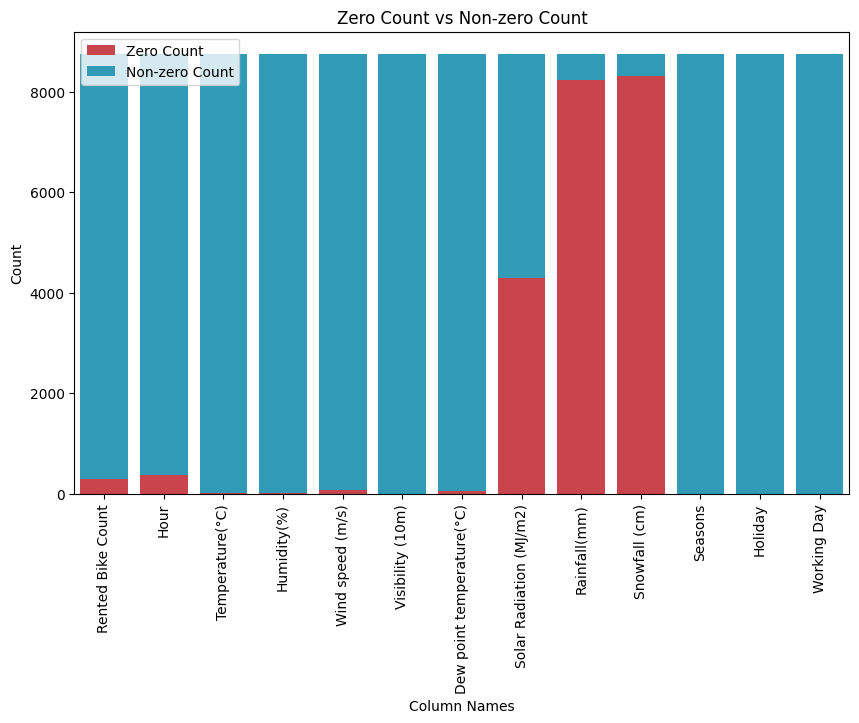

In [56]:
station_names = bicycle_sharing_df.columns[1:]
result_df = pd.DataFrame(columns=['station name', 'zero count', 'non zero count'])

for station_name in station_names:
    zero_count = (bicycle_sharing_df[station_name] == 0).sum()
    non_zero_count = (bicycle_sharing_df[station_name] != 0).sum()
    result_df.loc[len(result_df)] = [station_name, zero_count, non_zero_count]

# Create and customize the stacked bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(data=result_df, x='station name', y='zero count', color='#DF2E38', label='Zero Count')
sns.barplot(data=result_df, x='station name', y='non zero count', color='#19A7CE', bottom=result_df['zero count'], label='Non-zero Count')

# Customize the chart labels and title
plt.title('Zero Count vs Non-zero Count')
plt.xlabel('Column Names')
plt.ylabel('Count')
# plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

Now, we want to examining the 'Bike sharing of Seoul', to see if it has any null vlaues.

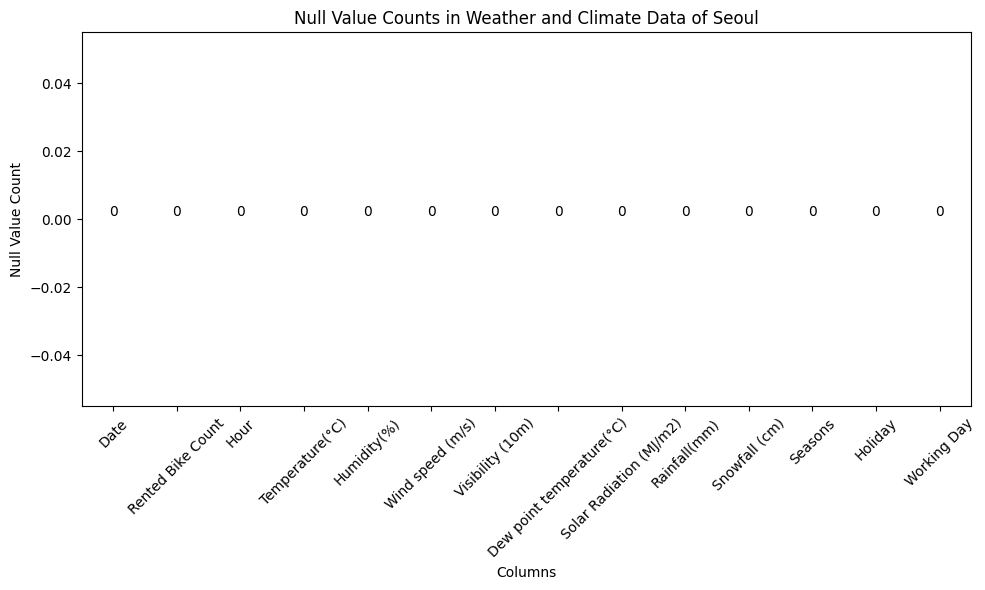

In [57]:
# Count the number of null values in each column
null_counts = bicycle_sharing_df.isnull().sum()

# Create a bar plot of null value counts
plt.figure(figsize=(10, 6))
ax = null_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts in Weather and Climate Data of Seoul')
plt.xticks(rotation=45)

# Add text annotations for null count above each bar
for i, count in enumerate(null_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

No null value was found in this dataset

#### 5.2. Exploration of the air pollution Data of Seoul




In [58]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  float64
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(9), object(2)
memory usage: 54.3+ MB


Now, let's examine the date range of the 'air pollution Data of Seoul' to determine the available data period, starting from the minimum date and ending at the maximum date.

In [59]:

date_df = pd.to_datetime(weather_data_df['Measurement date'], format='%Y-%m-%d %H:%M')
min_date = date_df.min().strftime('%B-%Y')
max_date = date_df.max().strftime('%B-%Y')
f"Date Range of the Weather Data: {min_date} to {max_date}"
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  float64
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(9), object(2)
memory usage: 54.3+ MB


Retaining records from December 2017 to November 2018 and specifically focusing on station number 103, located at the center of the city, provides the most representative data for assessing air pollution in Seoul."

In [60]:
# Define the start and end dates for the desired range
start_date = pd.to_datetime('December-2017', format='%B-%Y')
end_date = pd.to_datetime('November-2018', format='%B-%Y')


# Convert the 'Measurement date' column to datetime format
weather_data_df['Measurement date'] = pd.to_datetime(weather_data_df['Measurement date'])

# Create a boolean mask to filter the data
mask = (weather_data_df['Measurement date'] >= start_date) & (weather_data_df['Measurement date'] <= end_date)


# Apply the mask to filter the data
filtered_weather_data_df = weather_data_df[mask]

#Filter the DataFrame for station code 103
filtered_weather_data_df = filtered_weather_data_df[filtered_weather_data_df['Station code'] == 103]

# Find the minimum and maximum dates in the filtered DataFrame
min_filtered_date = filtered_weather_data_df['Measurement date'].min()
max_filtered_date = filtered_weather_data_df['Measurement date'].max()



# Format the dates as needed
min_filtered_date_str = min_filtered_date.strftime('%B-%Y')
max_filtered_date_str = max_filtered_date.strftime('%B-%Y')

# Print the results
print(f"Minimum Date in Filtered Weather Data: {min_filtered_date_str}")
print(f"Maximum Date in Filtered Weather Data: {max_filtered_date_str}")


Minimum Date in Filtered Weather Data: December-2017
Maximum Date in Filtered Weather Data: November-2018


In [61]:

filtered_weather_data_df.info()
filtered_weather_data_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8041 entries, 59826 to 67866
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Measurement date  8041 non-null   datetime64[ns]
 1   Station code      8041 non-null   float64       
 2   Address           8041 non-null   object        
 3   Latitude          8041 non-null   float64       
 4   Longitude         8041 non-null   float64       
 5   SO2               8041 non-null   float64       
 6   NO2               8041 non-null   float64       
 7   O3                8041 non-null   float64       
 8   CO                8041 non-null   float64       
 9   PM10              8041 non-null   float64       
 10  PM2.5             8041 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 753.8+ KB


,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
59826,2017-12-01 00:00:00,103.0,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.00485,0.003,0.017,0.022,0.3,17.0,9.0
59827,2017-12-01 01:00:00,103.0,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.00485,0.003,0.018,0.020,0.3,19.0,11.0
59828,2017-12-01 02:00:00,103.0,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.00485,0.003,0.016,0.020,0.3,15.0,13.0
59829,2017-12-01 03:00:00,103.0,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.00485,0.003,0.015,0.021,0.3,19.0,13.0
59830,2017-12-01 04:00:00,103.0,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.00485,0.004,0.016,0.022,0.3,13.0,7.0


Now, examining the 'Air pollution Data of Seoul',to see if it has any null vlaues.

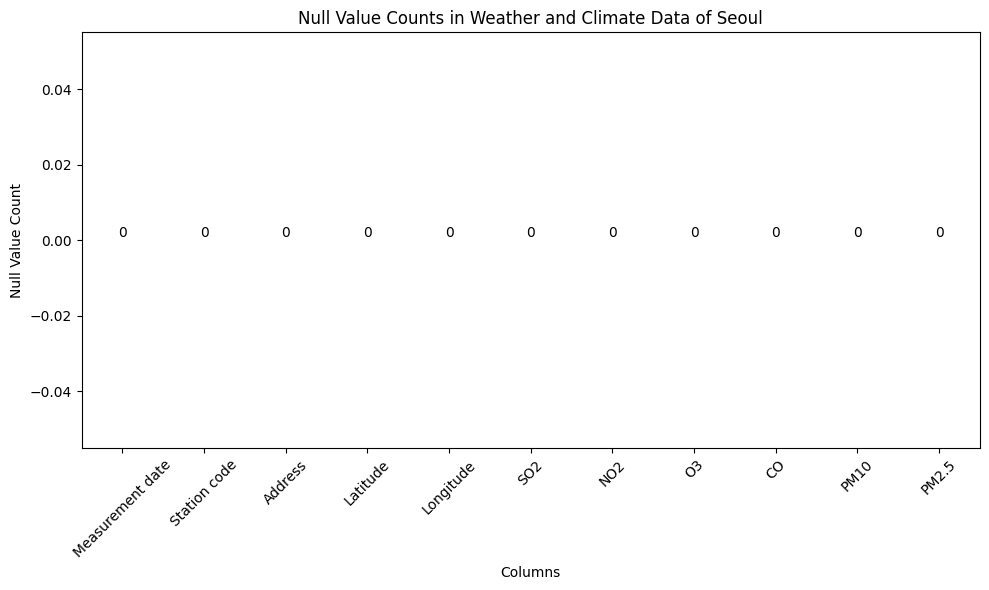

In [62]:
# Count the number of null values in each column
null_counts = filtered_weather_data_df.isnull().sum()

# Create a bar plot of null value counts
plt.figure(figsize=(10, 6))
ax = null_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts in Weather and Climate Data of Seoul')
plt.xticks(rotation=45)

# Add text annotations for null count above each bar
for i, count in enumerate(null_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

No null value was found in this dataset as well

#### 5.3. Exploration Summary

**Bicycle sharing Data in Seoul**
* Data available: December-2017 to November-2018
* No of rows: 8760 
* Remarks:
    - No null values, so no further data cleaning is necesaary.
    - Almost all the rainfall and snowfall values are zero.

**Air pollution Data of Seuol**
* Data available: January-2017 to December-2019
* Necessary data: December-2017 to November-2018; so we filtered this ammount of data and rest are discurded
* No of rows orginally: 647511
* No of rows after cleaning: 8041 
* Remarks: only 3 null values so we can ingnore those values.

### 6. Modifying and Combining Two Data Sources

#### 6.1. Modifiying Bike sharing Data in Seoul

Based on the previous data exploration, we can drop some cloumn and then use the data in our calculation.
- We will drop the Hour as we do not specfic hours in a specfic day


In [63]:
# Rename columns to match the desired column names and rearrange the columns in the desired order
filtered_weather_data_df = filtered_weather_data_df.copy()
filtered_weather_data_df.rename(columns={'Measurement date': 'Date'}, inplace=True)
columns_to_drop = ['Station code', 'Address', 'Latitude', 'Longitude']
filtered_weather_data_df.drop(columns=columns_to_drop, inplace=True)

# Convert the 'Date' column to an object datatype
filtered_weather_data_df['Date'] = filtered_weather_data_df['Date'].astype('object')


filtered_weather_data_df.head


<bound method NDFrame.head of                       Date    SO2    NO2     O3   CO  PM10  PM2.5
59826  2017-12-01 00:00:00  0.003  0.017  0.022  0.3  17.0    9.0
59827  2017-12-01 01:00:00  0.003  0.018  0.020  0.3  19.0   11.0
59828  2017-12-01 02:00:00  0.003  0.016  0.020  0.3  15.0   13.0
59829  2017-12-01 03:00:00  0.003  0.015  0.021  0.3  19.0   13.0
59830  2017-12-01 04:00:00  0.004  0.016  0.022  0.3  13.0    7.0
...                    ...    ...    ...    ...  ...   ...    ...
67862  2018-10-31 20:00:00  0.003  0.044  0.005  0.5  20.0   14.0
67863  2018-10-31 21:00:00  0.002  0.035  0.003  0.5  22.0   17.0
67864  2018-10-31 22:00:00  0.002  0.034  0.004  0.5  21.0   19.0
67865  2018-10-31 23:00:00  0.002  0.035  0.002  0.5  22.0   16.0
67866  2018-11-01 00:00:00  0.003  0.034  0.002  0.5  19.0   13.0

[8041 rows x 7 columns]>

In [64]:
# Assuming 'date' column is in '01/12/2017' format and 'Hour' column contains values from 0 to 23
# Convert 'date' column to datetime format
bicycle_sharing_df['Date'] = pd.to_datetime(bicycle_sharing_df['Date'], format="%d/%m/%Y")

# Create a new datetime column by combining 'date' and 'Hour'
bicycle_sharing_df['Date'] = bicycle_sharing_df['Date'] + pd.to_timedelta(bicycle_sharing_df['Hour'], unit='h')

# Drop the 'Hour' column if you no longer need it
bicycle_sharing_df.drop(columns=['Hour'], inplace=True)

# Convert the 'Date' column to an object datatype
bicycle_sharing_df['Date'] = bicycle_sharing_df['Date'].astype('object')

# Print the DataFrame with the new 'datetime' column

print(bicycle_sharing_df.head(10))


                  Date  Rented Bike Count  Temperature(°C)  Humidity(%)  \
0  2017-12-01 00:00:00              254.0             -5.2           37   
1  2017-12-01 01:00:00              204.0             -5.5           38   
2  2017-12-01 02:00:00              173.0             -6.0           39   
3  2017-12-01 03:00:00              107.0             -6.2           40   
4  2017-12-01 04:00:00               78.0             -6.0           36   
5  2017-12-01 05:00:00              100.0             -6.4           37   
6  2017-12-01 06:00:00              181.0             -6.6           35   
7  2017-12-01 07:00:00              460.0             -7.4           38   
8  2017-12-01 08:00:00              930.0             -7.6           37   
9  2017-12-01 09:00:00              490.0             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2            2000.0                      -17.6   
1               0.8            2000.0 

#### 6.3. Combining Two Data Sources

Now, let's combine the modified bicycle traffic data and weather data into a single dataframe, which will represent the data for Seoul city. The combined dataframe will contain the following columns:

In [65]:
final_combined_df = pd.merge(filtered_weather_data_df, bicycle_sharing_df, how="inner", on='Date')

final_combined_df.head()


,Date,SO2,NO2,O3,CO,PM10,PM2.5,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Working Day
0,2017-12-01 00:00:00,0.003,0.017,0.022,0.3,17.0,9.0,254.0,-5.2,37,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01 01:00:00,0.003,0.018,0.020,0.3,19.0,11.0,204.0,-5.5,38,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01 02:00:00,0.003,0.016,0.020,0.3,15.0,13.0,173.0,-6.0,39,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01 03:00:00,0.003,0.015,0.021,0.3,19.0,13.0,107.0,-6.2,40,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01 04:00:00,0.004,0.016,0.022,0.3,13.0,7.0,78.0,-6.0,36,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### 7. Exploratory Data Analysis (EDA)

#### 7.1. Descriptive Statistics

In [66]:
final_combined_df.describe()


,SO2,NO2,O3,CO,PM10,PM2.5,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000
mean,-0.020863,0.003152,-0.001476,0.380400,34.159930,23.384281,709.760353,13.336351,58.271484,1.755404,1459.226837,4.521552,0.586999,0.152145,0.066484
std,0.154783,0.159249,0.158946,0.266489,28.162103,72.759250,657.281222,12.291548,20.339269,1.046617,603.699580,13.392826,0.886155,1.126957,0.378160
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,0.002000,0.016000,0.008000,0.300000,14.000000,8.000000,191.000000,3.200000,43.000000,1.000000,977.000000,-4.600000,0.000000,0.000000,0.000000
50%,0.003000,0.025000,0.020000,0.400000,29.000000,17.000000,485.000000,15.300000,57.000000,1.600000,1741.000000,6.400000,0.020000,0.000000,0.000000
75%,0.004000,0.038000,0.032000,0.500000,45.000000,29.000000,1080.000000,23.200000,74.000000,2.400000,2000.000000,15.600000,0.960000,0.000000,0.000000
max,0.015000,0.106000,0.161000,1.200000,330.000000,6256.000000,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


The `describe()` function was used to generate descriptive statistics for the numerical columns in the dataset, including count, mean, standard deviation, minimum, quartiles, and maximum values.

#### 7.2. Histograms

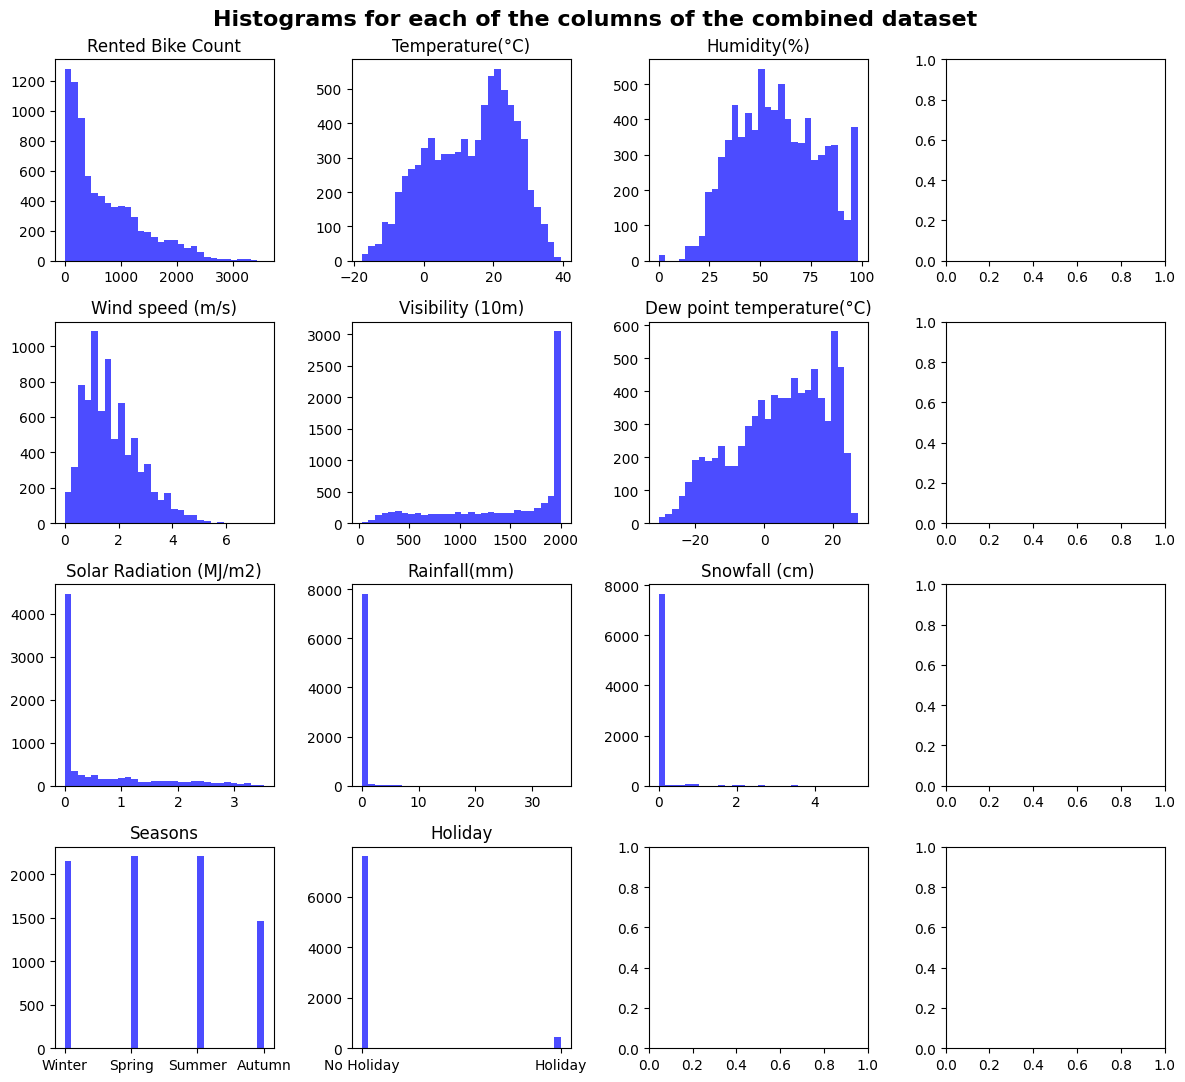

In [67]:
# Plot histograms
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 11))

cols = ['Rented Bike Count', 'Temperature(°C)',  'Humidity(%)', 'Wind speed (m/s)',
        'Visibility (10m)',  'Dew point temperature(°C)',  'Solar Radiation (MJ/m2)',
        'Rainfall(mm)',  'Snowfall (cm)', 'Seasons', 'Holiday']

cols_name = ['Rented Bike Count', 'Temperature(°C)',  'Humidity(%)', 'Wind speed (m/s)',
             'Visibility (10m)',  'Dew point temperature(°C)',  'Solar Radiation (MJ/m2)',
             'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday']

for i, col in enumerate(cols):
    ax = axes[i // 3, i % 3]
    
    # Check if the column has any non-null data points
    if final_combined_df[col].notna().any():
        ax.hist(final_combined_df[col], bins=30, color='blue', alpha=0.7)
        ax.set_title(cols_name[i])
    else:
        # If the column has no non-null data, remove the subplot
        fig.delaxes(ax)

plt.suptitle('Histograms for each of the columns of the combined dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


- Histograms were created for each of the columns and it shows the distribution of values for columns such as - Rented Bike Count', 'Temperature(°C)',  'Humidity(%)',  'Wind speed (m/s)',  'Visibility',  'Dew point temperature(°C)',  'Solar Radiation (MJ/m2)',  'Rainfall(mm)',  'Snowfall (cm)',  'Seasons',  'Holiday'
- The number of bins was set to 30, and kernel density estimation (KDE) was enabled to visualize the underlying distribution.


#### 7.3. Box Plots

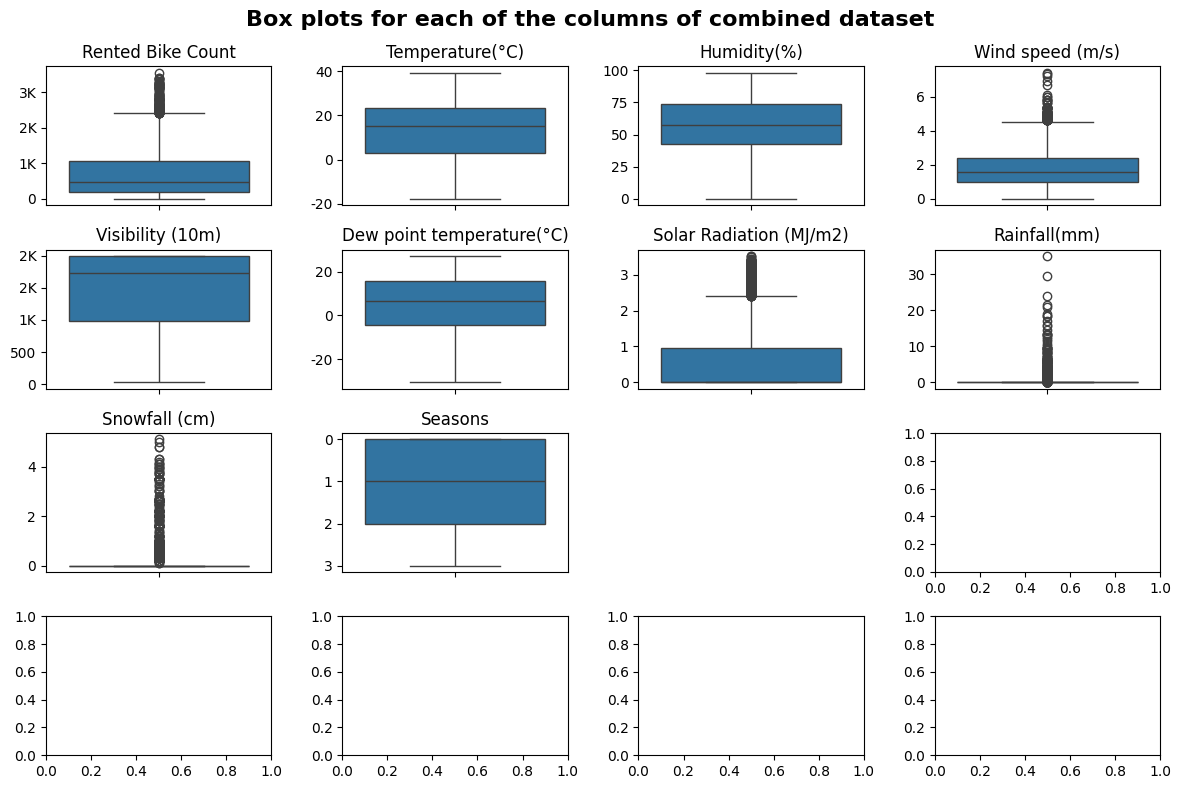

In [68]:
# Create box plots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 8))
for i, col in enumerate(cols):
    ax = axes[i//4, i%4]  # Adjust the indexing here
    sns.boxplot(data=final_combined_df, y=col, ax=ax)
    ax.set_title(cols_name[i])
    ax.set_ylabel('')

    if col == 'pres':
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))
    else:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))

fig.delaxes(axes[2, 2]) # Remove empty subplot and hide axis labels

plt.suptitle('Box plots for each of the columns of combined dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Box plots were created for each of the columns and each box plot provide information about the distribution, central tendency, and presence of outliers in the variables.

### 8. Questions and Analysis

#### 8.1. How does the temperature in Seoul city vary throughout the years?

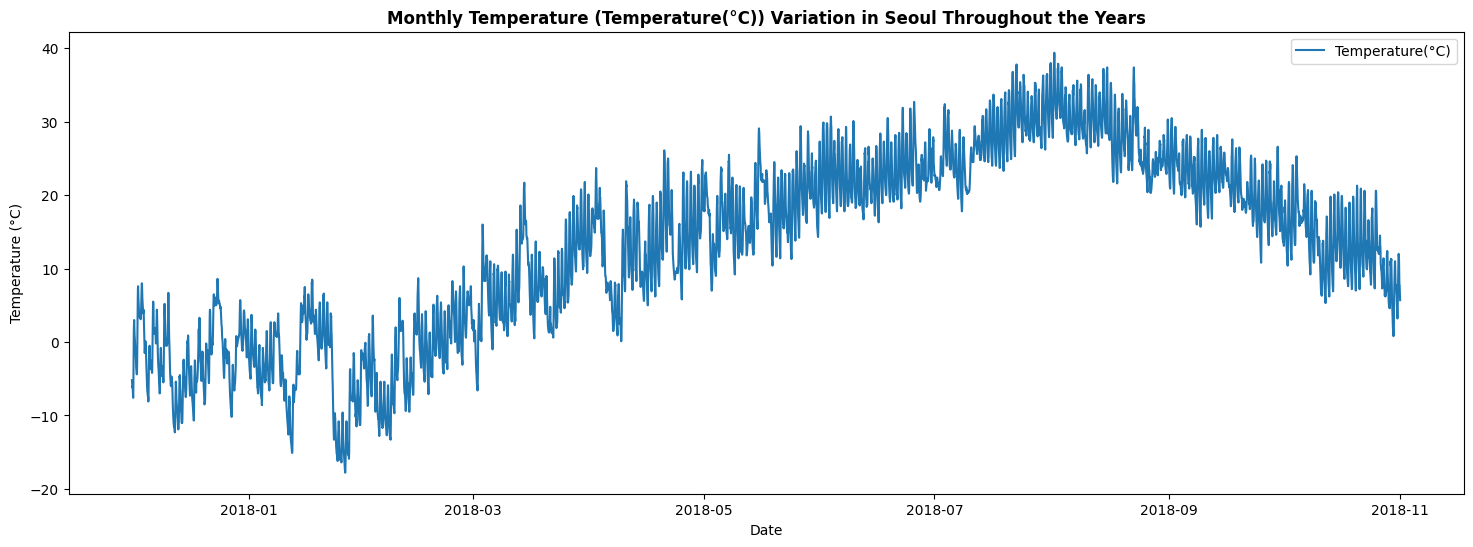

In [69]:
# Line plot of temperature variation
plt.figure(figsize=(18, 6))

for col in ['Temperature(°C)']:
    plt.plot(final_combined_df['Date'].to_numpy(), final_combined_df[col].to_numpy(), label=col)

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Temperature (Temperature(°C)) Variation in Seoul Throughout the Years', fontweight='bold')
plt.legend(loc="upper right")
#plt.xticks(range(0, len(final_combined_df), 12), final_combined_df['date'].iloc[::12], rotation=0)
plt.show()



The city of Seoul experiences notable temperature fluctuations throughout the year, and these changes follow a distinct seasonal cycle. Generally, temperatures tend to be higher during the summer months and lower during the winter months. By analyzing the average temperature data, we can gain valuable insights into these temperature trends over the years. This analysis allows us to identify recurring seasonal patterns and gain a deeper understanding of the city's climate variations.

#### 8.2. How does the bike sharing in Seoul city vary throughout the years?

C:\Users\Piyal\AppData\Local\Temp\ipykernel_13300\2181913206.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in plt.gca().get_yticks()]) # Modify y-axis tick labels


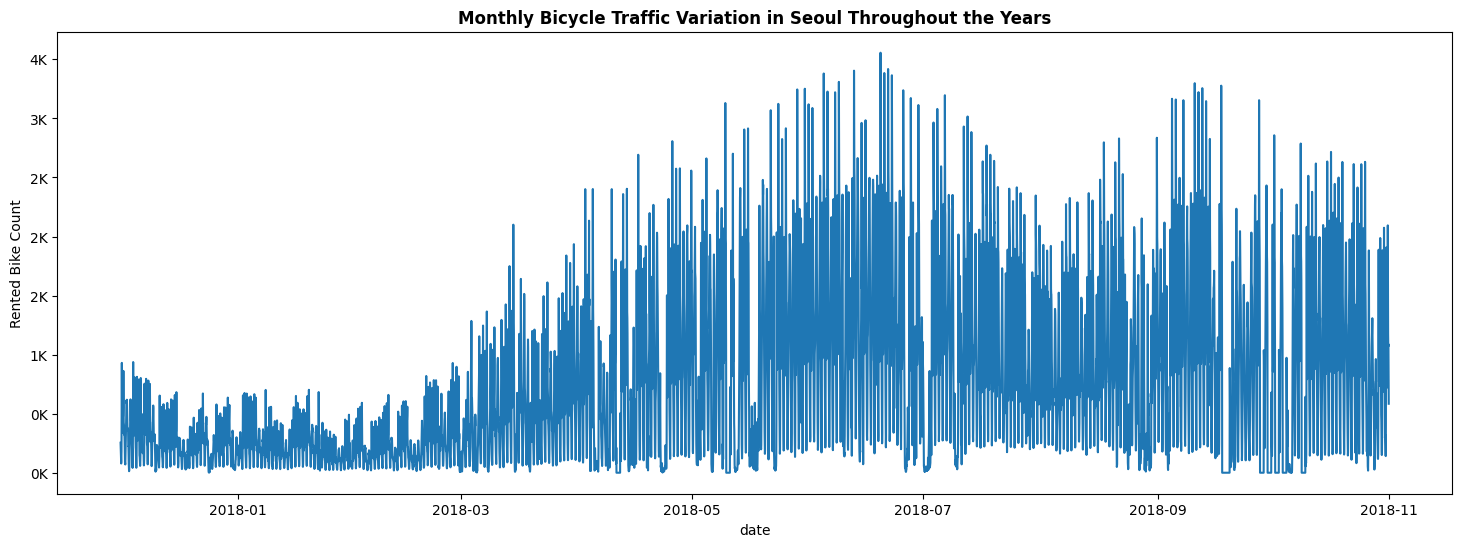

In [70]:
# Line plot of bicycle traffic variation
plt.figure(figsize=(18, 6))

plt.plot(final_combined_df['Date'].to_numpy(), final_combined_df['Rented Bike Count'].to_numpy())

plt.xlabel('date')
plt.ylabel('Rented Bike Count')
plt.title('Monthly Bicycle Traffic Variation in Seoul Throughout the Years', fontweight='bold')
plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in plt.gca().get_yticks()]) # Modify y-axis tick labels
plt.show()

The bicycle sharing system in Seoul experiences fluctuations over the course of each year, which can be attributed to both seasonal changes and the potential impact of weather conditions. Much like the temperature patterns we've observed, the bicycle traffic data shows variations, with increased usage during favorable weather and decreased usage during less favorable conditions. This implies a connection between weather and bicycle utilization, indicating that people are more inclined to use bicycles in pleasant weather. Additionally, it's evident that the demand for bike sharing has significantly surged over the past year.

#### 8.3. Does temperature affect bike sharing in Seoul city?

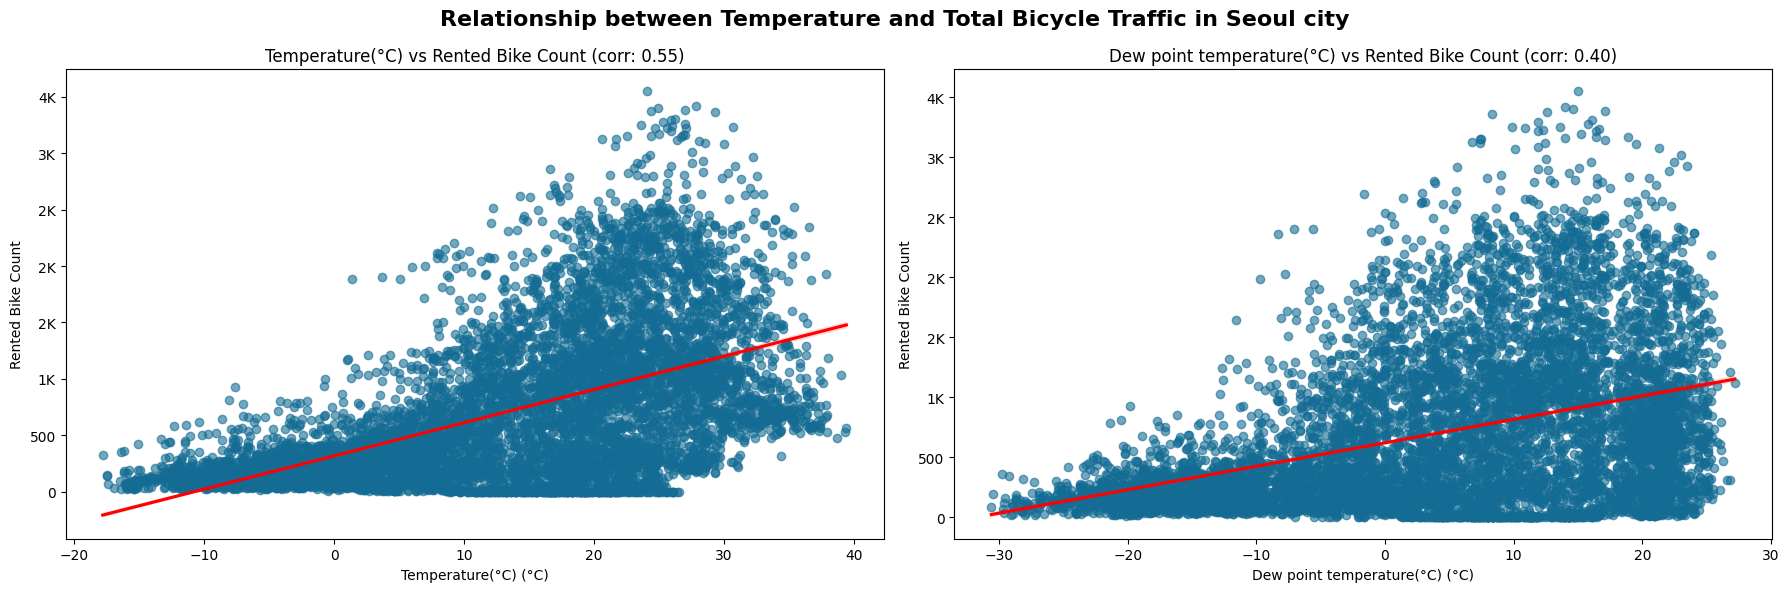

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for i, col in enumerate(['Temperature(°C)', 'Dew point temperature(°C)']):
    ax = axes[i]
    sns.regplot(data=final_combined_df, x=col, y='Rented Bike Count', ax=ax,
                scatter_kws = {"color": "#146C94", "alpha": 0.6},
                line_kws = {"color": "red"},
                ci = 95)
    
    # Calculate the correlation between temperature ('max_temp', 'mean_temp', 'min_temp') and new bike shares
    correlation = final_combined_df[[col, 'Rented Bike Count']].corr().iloc[0, 1]
    
    ax.set_title(f'{col} vs Rented Bike Count (corr: {correlation:.2f})')
    ax.set_xlabel(col+' (°C)')
    ax.set_ylabel('Rented Bike Count')
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))

plt.suptitle('Relationship between Temperature and Total Bicycle Traffic in Seoul city', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Temperature plays a pivotal role in shaping bicycle usage trends within Seoul. Our examination of temperature metrics, including 'Temperature(°C)' and 'Dew point temperature(°C),' in conjunction with bicycle sharing data, underscores a conspicuous connection between the two variables. As temperatures rise, indicative of warmer weather conditions, there is a corresponding surge in bicycle traffic. Conversely, a decline in temperatures, signaling colder weather, results in diminished bicycle utilization. This unequivocal association underscores the pivotal role of temperature in influencing individuals' decisions to opt for bicycles as their preferred mode of transportation.

#### 8.4. Is there any relation between the monthly Humidity total and Wind speed (m/s) on the total bike sharing in Seoul?

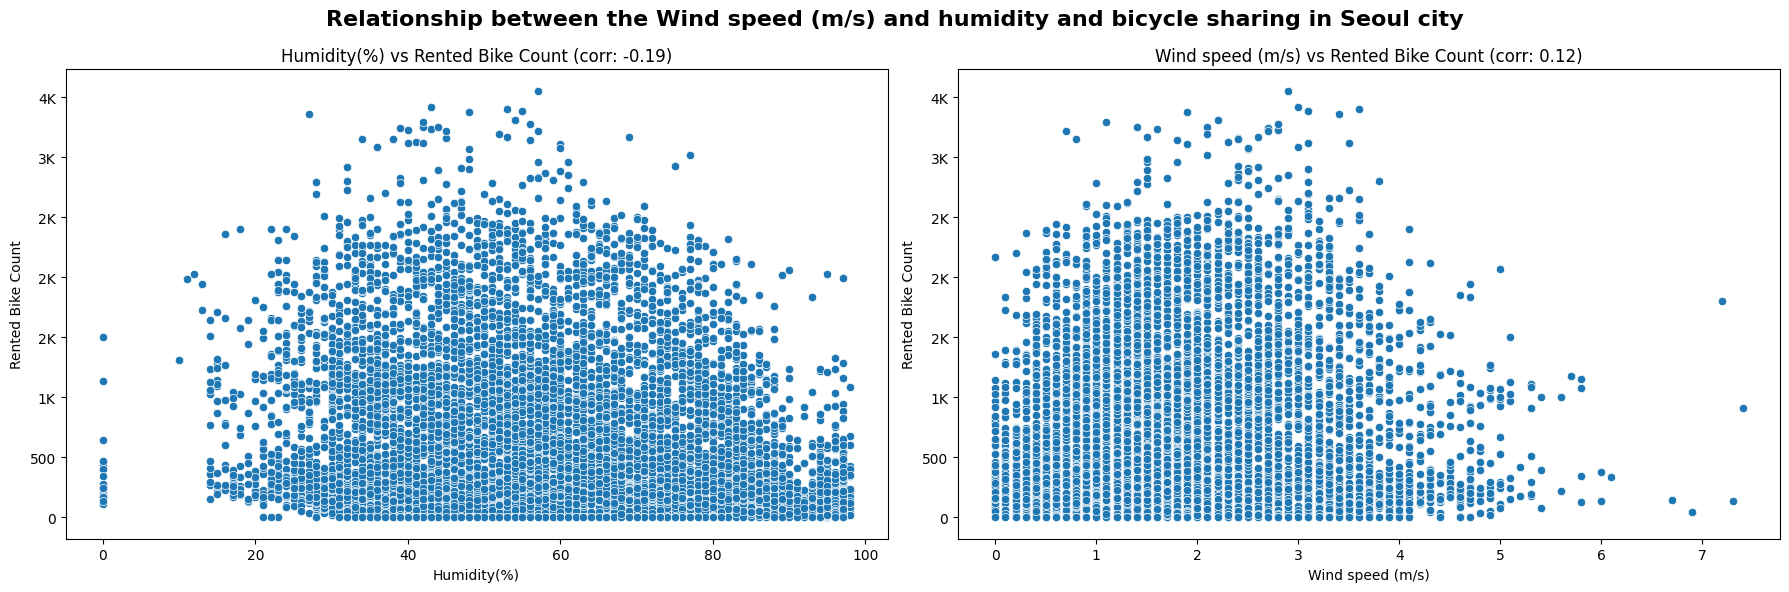

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for i, col_details in enumerate([('Humidity(%)', 'Humidity(%)'), ('Wind speed (m/s)', 'Wind speed (m/s)')]):
    col, col_name = col_details
    ax = axes[i]
    sns.scatterplot(data=final_combined_df, x=col, y='Rented Bike Count', ax=ax)

    # Calculate the correlation between temperature (tavg, tmin, tmax) and total_traffic
    correlation = final_combined_df[[col, 'Rented Bike Count']].corr().iloc[0, 1]
    
    ax.set_title(f'{col} vs Rented Bike Count (corr: {correlation:.2f})')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Rented Bike Count')
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))

plt.suptitle('Relationship between the Wind speed (m/s) and humidity and bicycle sharing in Seoul city', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

We have identified an inverse relationship between the monthly total humidity and bicycle traffic within Seoul city. Specifically, as humidity levels rise, there is a corresponding decrease in bike sharing activity. Conversely, when examining wind levels throughout the year, we observe a positive correlation with bicycle usage. It is worth noting that while there is a positive pattern, the correlation value remains low, indicating a limited likelihood of this relationship being statistically significant.

#### 8.5. How do NO2 and PM10 impact the total bike sharing in Seoul? 

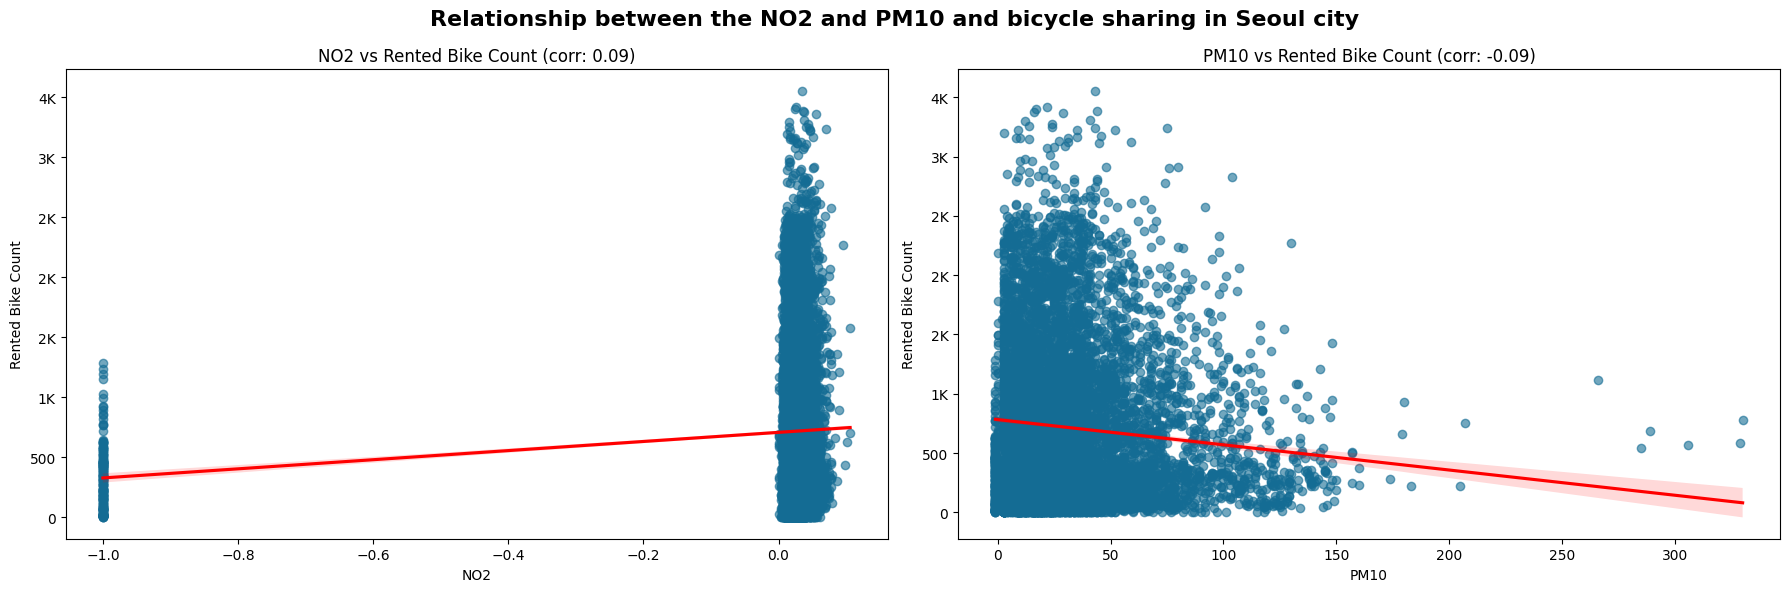

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for i, col_details in enumerate([('NO2', 'NO2'), ('PM10', 'PM10')]):
    col, col_name = col_details
    ax = axes[i]
    sns.regplot(data=final_combined_df, x=col, y='Rented Bike Count', ax=ax,
                scatter_kws = {"color": "#146C94", "alpha": 0.6},
                line_kws = {"color": "red"},
                ci = 95)
    
    # Calculate the correlation between temperature (tavg, tmin, tmax) and total_traffic
    correlation = final_combined_df[[col, 'Rented Bike Count']].corr().iloc[0, 1]
    
    ax.set_title(f'{col} vs Rented Bike Count (corr: {correlation:.2f})')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Rented Bike Count')
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))

plt.suptitle('Relationship between the NO2 and PM10 and bicycle sharing in Seoul city', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


The analysis of NO2 and PM10 reveals distinct effects on total bicycle traffic within Seoul. Specifically, we observe a correlation between NO2 and bicycle traffic, with a correlation value of 0.09. This positive correlation implies that as NO2 levels increase, there is a tendency for bicycle traffic to rise as well. Conversely, for PM10, we find a correlation value of -0.09, indicating a reverse relationship. In this case, as PM10 levels increase, bicycle traffic tends to decrease. But as the correlation values are at the low end suggesting that favorable weather conditions even with pollution encourage people to use bicycles for commuting and recreational purposes.

#### 8.6. How do the different seasons impact the total bicycle traffic in Seoul?

To facilitate our analysis based on seasons, we have a column named `season` in our dataset. The `season` column was created by aligning the months in our `date` column with the distinct seasons of Korea. These seasons are demarcated as follows:
Spring, Summer, Autumn, Winter


In [74]:
# Create a dictionary to map seasons to colors
season_to_color = {
    "Spring": "green", "Summer": "red", "Autumn": "orange", "Winter": "blue"
}

# Map seasons to colors using the dictionary
final_combined_df["color"] = final_combined_df["Seasons"].map(season_to_color)

final_combined_df.iloc[100:110, :]


,Date,SO2,NO2,O3,CO,PM10,PM2.5,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Working Day,color
100,2017-12-05 04:00:00,0.003,0.009,0.026,0.2,10.0,9.0,42.0,-7.2,34,3.0,2000.0,-20.4,0.00,0.0,0.0,Winter,No Holiday,Yes,blue
101,2017-12-05 05:00:00,0.004,0.010,0.024,0.2,18.0,11.0,82.0,-7.4,33,2.6,2000.0,-20.9,0.00,0.0,0.0,Winter,No Holiday,Yes,blue
102,2017-12-05 06:00:00,0.004,0.021,0.014,0.2,11.0,7.0,172.0,-7.4,34,3.2,2000.0,-20.6,0.00,0.0,0.0,Winter,No Holiday,Yes,blue
103,2017-12-05 07:00:00,0.003,0.029,0.009,0.3,16.0,13.0,381.0,-7.5,33,2.2,2000.0,-21.0,0.00,0.0,0.0,Winter,No Holiday,Yes,blue
104,2017-12-05 08:00:00,0.004,0.031,0.009,0.3,11.0,9.0,812.0,-8.1,36,1.6,2000.0,-20.5,0.01,0.0,0.0,Winter,No Holiday,Yes,blue
105,2017-12-05 09:00:00,0.004,0.021,0.015,0.3,11.0,5.0,462.0,-7.6,31,1.3,1974.0,-21.8,0.21,0.0,0.0,Winter,No Holiday,Yes,blue
106,2017-12-05 10:00:00,0.004,0.019,0.017,0.3,17.0,11.0,269.0,-5.5,26,2.8,1967.0,-22.0,0.64,0.0,0.0,Winter,No Holiday,Yes,blue
107,2017-12-05 11:00:00,0.004,0.019,0.019,0.3,15.0,11.0,334.0,-3.9,25,0.0,1959.0,-21.0,0.00,0.0,0.0,Winter,No Holiday,Yes,blue
108,2017-12-05 12:00:00,0.004,0.017,0.020,0.3,23.0,10.0,321.0,-2.3,25,0.0,1962.0,-19.7,0.00,0.0,0.0,Winter,No Holiday,Yes,blue
109,2017-12-05 13:00:00,0.004,0.016,0.022,0.3,15.0,6.0,325.0,-1.6,27,0.0,1955.0,-18.2,0.00,0.0,0.0,Winter,No Holiday,Yes,blue


To analyze how different seasons impact the total bicycle traffic in Seoul, we can create a violin plot that visualizes the distribution of bicycle traffic for each season. This will allow us to observe any variations in traffic patterns across the four seasons.

C:\Users\Piyal\AppData\Local\Temp\ipykernel_13300\3866505144.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in plt.gca().get_yticks()]) # Modify y-axis tick labels


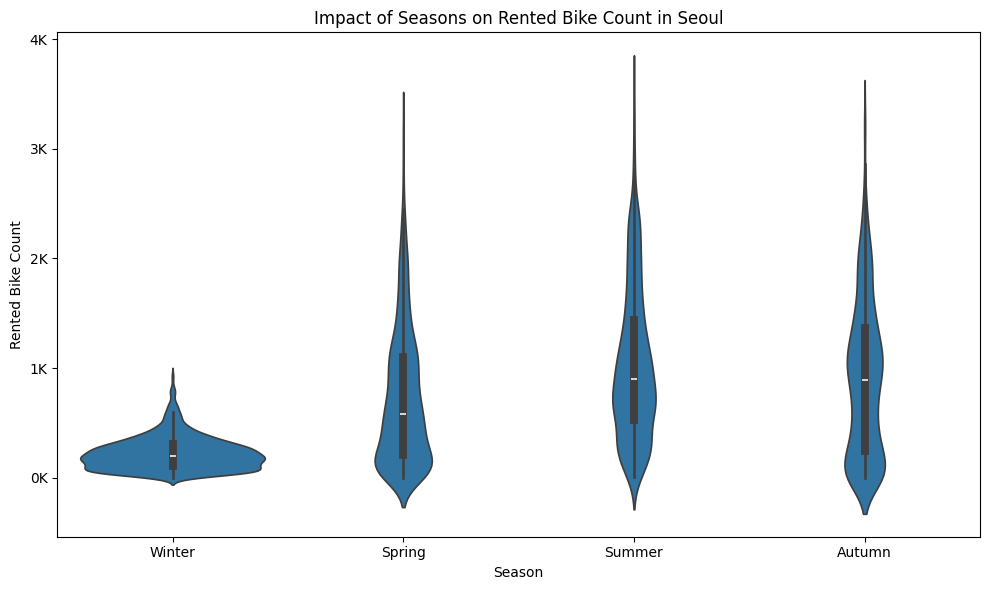

In [75]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=final_combined_df, x='Seasons', y='Rented Bike Count')

plt.xlabel("Season")
plt.ylabel("Rented Bike Count")
plt.title("Impact of Seasons on Rented Bike Count in Seoul")
plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in plt.gca().get_yticks()]) # Modify y-axis tick labels
plt.tight_layout()
plt.show()

The analysis of bike traffic patterns in Seoul over the course of a year reveals distinct seasonal trends. Notably, during the summer months, there is a substantial surge in the number of cyclists, which can be attributed to the more favorable biking weather. Conversely, in the winter season, there is a noticeable decline in bicycle usage, likely due to the colder climate. Spring and autumn both exhibit relatively higher levels of bike traffic compared to the winter months, suggesting a consistent preference for cycling during these transitional seasons. These findings underscore the significant influence of weather conditions on cycling habits, with summer emerging as the most popular season for biking and winter as the least favored.

### 9. Summery

This comprehensive study delved into the intricate relationship between weather conditions and bicycle usage in Seoul. The key takeaways from our analysis are as follows:

* Temperature emerges as a pivotal factor impacting bicycle usage, with higher temperatures encouraging increased cycling, while cooler weather leads to reduced activity.

* We noted an inverse correlation between Humidity and bike sharing, with humidity levels exhibiting a stronger negative association with bicycle traffic.

* The influence of wind speed on cycling habits was observed to be negative, suggesting that higher wind speeds deter individuals from cycling, while an extended duration of summer was found to have a positive effect.

Our seasonal analysis unveiled distinct trends in bicycle traffic. The summer months witnessed a substantial upsurge in cycling activity, whereas winter saw a noticeable decline. Both spring and autumn demonstrated higher levels of cycling compared to winter, with no significant difference between the two.

These findings hold substantial implications for urban planners and policymakers, particularly in the realm of promoting cycling as an environmentally friendly mode of transportation. By comprehending the profound impact of weather on cycling behaviors, city officials can formulate strategies to enhance Seoul's cycling infrastructure and foster a greater adoption of bicycles for daily commuting, contributing to a more sustainable and active city.

### 10. Future Work
While this study has provided valuable insights into the nexus between weather conditions and bicycle usage in Seoul, there are several promising avenues for future research that can build upon our current progress and findings:

* Extended Temporal Analysis: Expanding the dataset to encompass multiple years, such as 2017, 2018, 2019, and beyond, would enhance the robustness of our conclusions. This longitudinal approach would allow us to identify and validate long-term trends and patterns in bicycle traffic behavior.

* Advanced Analytical Techniques: To unveil hidden insights within the existing dataset, future work could employ advanced analytical techniques, including machine learning algorithms and time series analysis. These approaches can unearth nuanced relationships, anomalies, or predictive models that were not explored in this study.

* Incorporating Additional Weather Parameters: Our investigation primarily focused on temperature, humidity, wind speed, and sunshine duration. Future research can consider incorporating other meteorological variables, such as air quality indices, precipitation patterns, and atmospheric pressure, for a more comprehensive understanding of their influence on bicycle usage.

* Enhanced Correlation Analysis: To quantify the strength and direction of relationships more precisely, future studies could employ statistical tools like correlation coefficients, regression analysis, or causal inference methods. This would provide a more nuanced assessment of how weather variables interact with bicycle traffic.

* Integration of External Data Sources: Augmenting the existing dataset with external sources of information, such as traffic volume data or socio-economic indicators, could yield a more holistic perspective on the factors influencing bicycle sharing trends. This multifaceted approach would contribute to a deeper comprehension of the complex interplay between weather, urban dynamics, and cycling habits.

By pursuing these avenues of future work, researchers can continue to refine our understanding of the intricate relationship between weather and bicycle usage in urban environments. These endeavors hold the potential to inform evidence-based policies and interventions that promote sustainable and active transportation solutions in cities like Seoul.